In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [47]:
data_train_path = "skin-cancer/train"
data_test_path = "skin-cancer/test"
data_val_path = "skin-cancer/validation"


In [48]:
img_width = 226
img_height = 226


In [49]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split=False)


Found 700 files belonging to 9 classes.


In [50]:
data_cat = data_train.class_names


In [51]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height, img_width),
                                                       batch_size=32,
                                                       shuffle=False,
                                                       validation_split=False)


Found 700 files belonging to 9 classes.


In [52]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                        image_size=(img_height, img_width),
                                                        shuffle=False,
                                                        batch_size=32,
                                                        validation_split=False)


Found 700 files belonging to 9 classes.


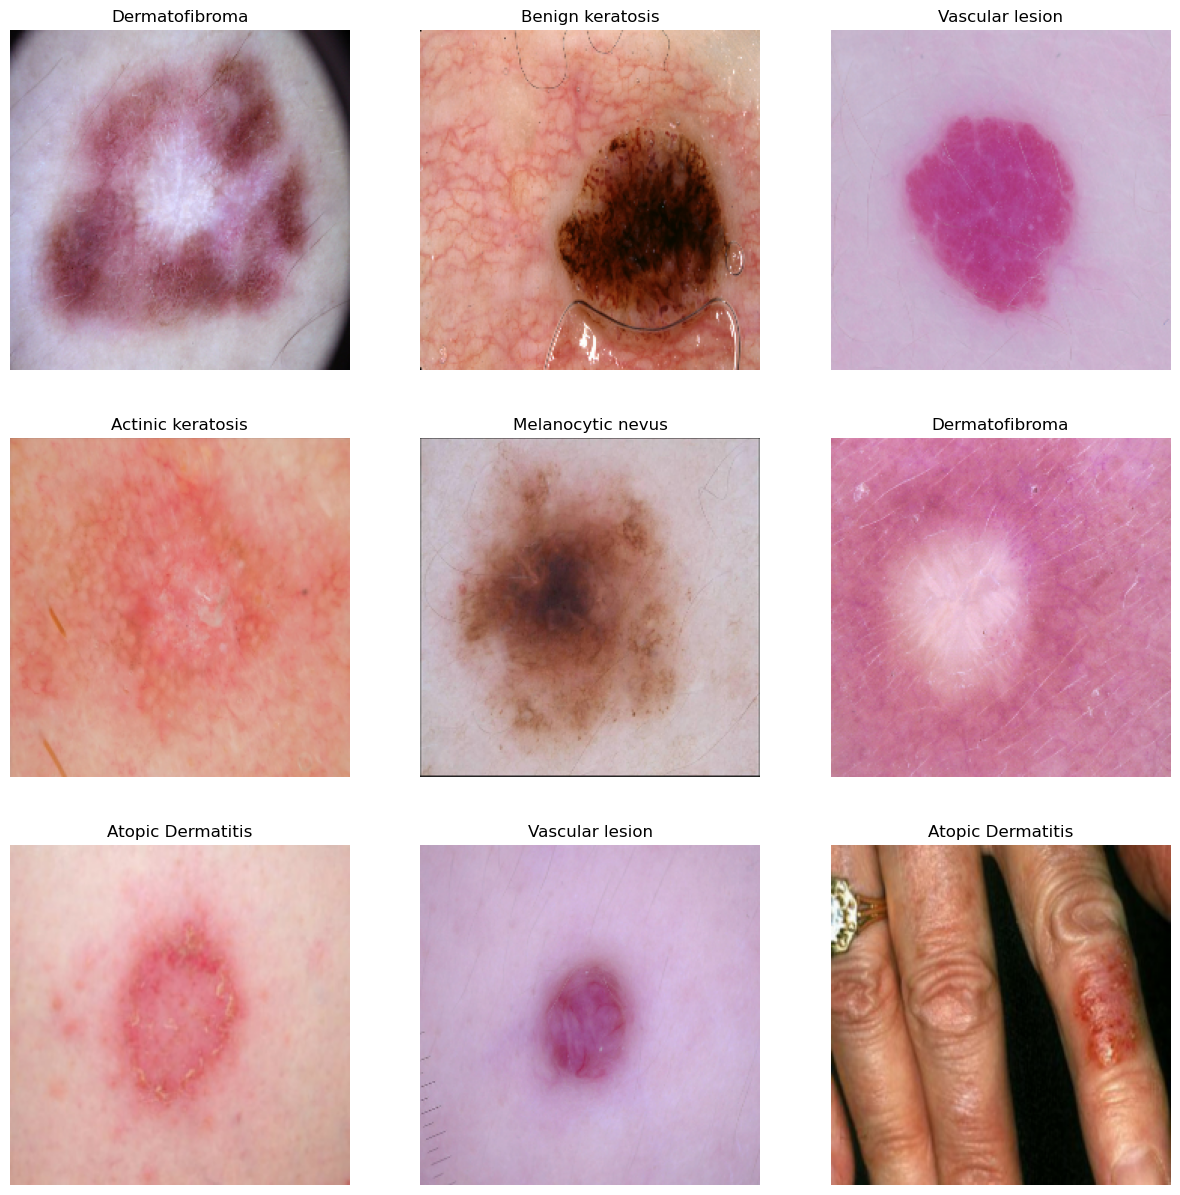

In [53]:
plt.figure(figsize = (15,15))
for images, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis("off")
        

In [54]:
from tensorflow.keras.models import Sequential


In [55]:
img_width = 226
img_height = 226

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(img_width, img_height),
    layers.Rescaling(1.0/255)
])


In [56]:
img_width = 226
img_height = 226
input_shape = (img_width, img_height)
model = Sequential([
    resize_and_rescale,
    layers.Conv2D(16, 3, padding="same", activation="relu", input_shape = input_shape),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),  # Add activation function here if necessary
    layers.Dense(len(data_cat), activation="softmax")  # Specify the correct number of units and activation function
])


In [57]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [58]:
epochs_size = 30
history=model.fit(data_train,validation_data=data_val, epochs=epochs_size)


Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 330ms/step - accuracy: 0.1921 - loss: 3.2168 - val_accuracy: 0.2800 - val_loss: 1.9282
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 336ms/step - accuracy: 0.2953 - loss: 1.8549 - val_accuracy: 0.4843 - val_loss: 1.4439
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step - accuracy: 0.4697 - loss: 1.4643 - val_accuracy: 0.5871 - val_loss: 1.1428
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 376ms/step - accuracy: 0.5667 - loss: 1.1868 - val_accuracy: 0.5871 - val_loss: 1.0479
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 373ms/step - accuracy: 0.6206 - loss: 1.0250 - val_accuracy: 0.6743 - val_loss: 0.8539
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 365ms/step - accuracy: 0.7161 - loss: 0.8336 - val_accuracy: 0.7157 - val_loss: 0.8971
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 356ms/step - accuracy: 0.7109 - loss: 0.8420 - val_accuracy: 0.7671 - val_loss: 0.6397
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 383ms/step - accuracy: 0.7355 - loss: 0.7236 - val_accuracy: 0.

In [59]:
scores = model.evaluate(data_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.9916 - loss: 0.0398


Text(0.5, 1.0, 'Loss')

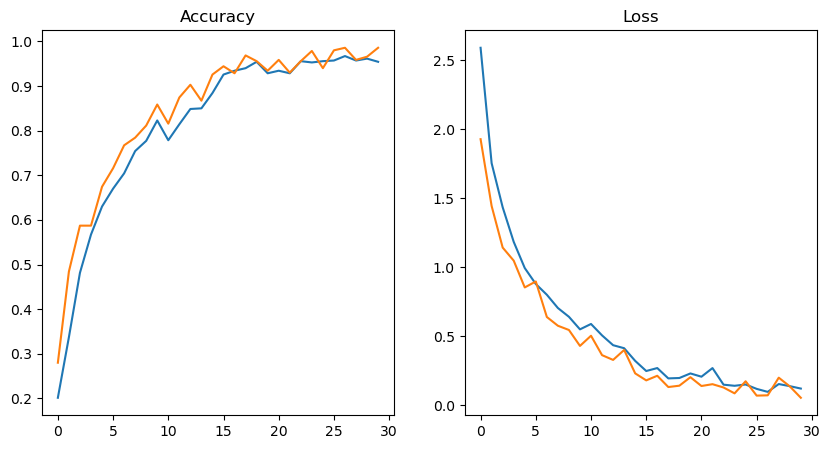

In [60]:
epochs_range = range(epochs_size)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy') # Corrected typo 'pit. send doc poces eat aCe'
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss') # Corrected typo 'pit. send doc poces eat aCe'
plt.title('Loss')




In [61]:
np.argmax([ 26.436392,2.0658166 ,-20.604046,15.68354,-18.17734
  -6.4164414,13.573213,11.388335,-0.52048355])

0

First image to predict:
Actual label: Actinic keratosis
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
predicted label: Actinic keratosis


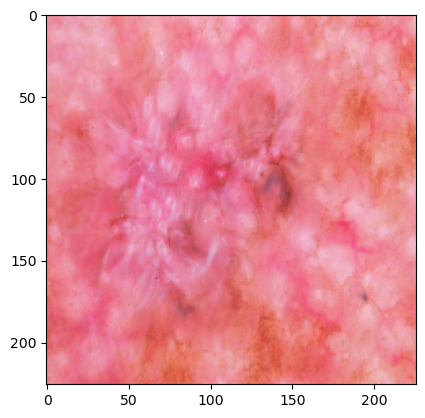

In [62]:
for images_batch, labels_batch in data_test.take(1):
    first_image = images_batch[0].numpy().astype('uint8') 
    first_label = labels_batch[0].numpy()  
    print("First image to predict:")
    plt.imshow(first_image)
    print("Actual label:", data_cat[first_label])  

    batch_prediction = model.predict(images_batch)
    print("predicted label:", data_cat[np.argmax(batch_prediction[0])])

In [63]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img) 
    img_array = tf.expand_dims(img_array, 0)  
    
    predictions = model.predict(img_array)
    
    max_prediction = np.max(predictions[0])
    sum_predictions = np.sum(predictions[0])
    
    confidence = np.clip(round((max_prediction / sum_predictions) * 100, 2), 0, 100)
    predicted_class = data_cat[np.argmax(predictions[0])]
    
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


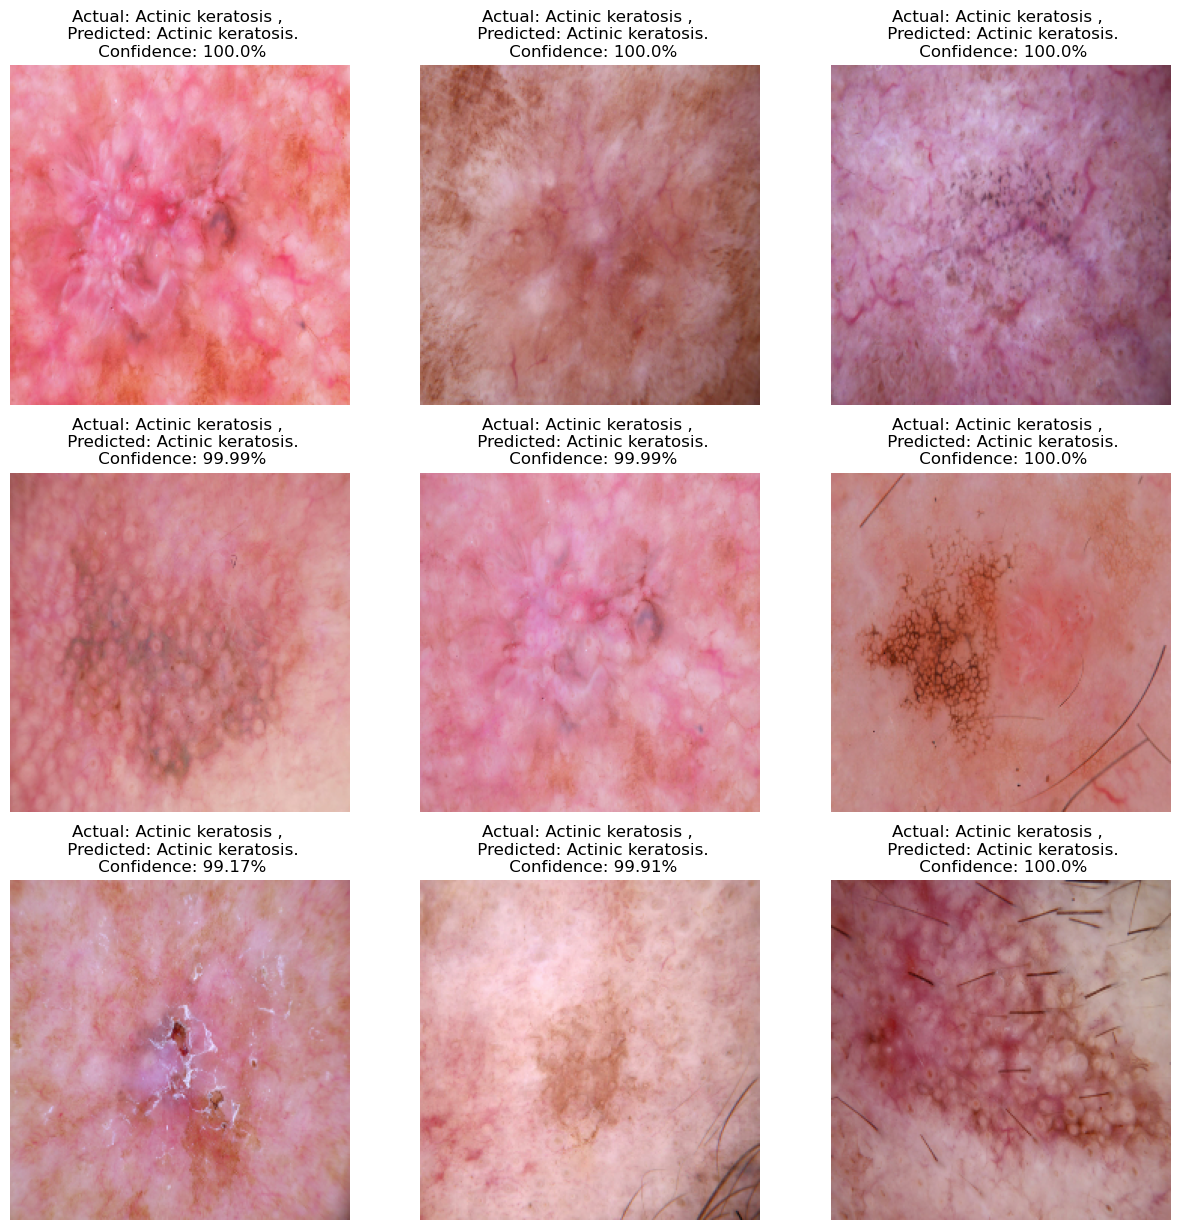

In [64]:
plt.figure(figsize=(15, 15))
for images, labels in data_test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  
        predicted_class, confidence = predict(model, images[i].numpy()) 
        actual_class = data_cat[labels[i]] 
        
        plt.title(f"Actual: {actual_class} , \n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")



In [65]:
import os

# List all files in the directory
files = os.listdir("../model")

# Filter out filenames with valid extensions
valid_files = [file for file in files if file.endswith('.keras')]

# Extract version numbers and increment the maximum version by 1
model_version = max([int(file.split('.')[0]) for file in valid_files] + [0]) + 1

# Save the model with the new version number in the native Keras format
model.save(f"../model/{model_version}.keras")

